In [18]:
%config IPCompleter.greedy=True
import tensorflow as tf

# 28x28 images of hand-written digits 0-9
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Research these components for more detail, used to tune model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2650 - accuracy: 0.9209
Epoch 2/3
60000/60000 [==============================] - 4s 66us/sample - loss: 0.1080 - accuracy: 0.9670
Epoch 3/3
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0747 - accuracy: 0.9765


In [19]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.09692018219940364 0.9696


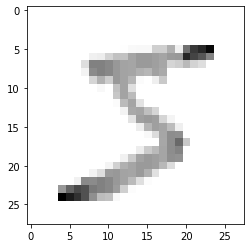

In [9]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [20]:
model.save('mnist_sample.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: mnist_sample.model/assets


In [21]:
predictions = model.predict([x_test])

In [25]:
import numpy as np

print(np.argmax(predictions[15]))

5


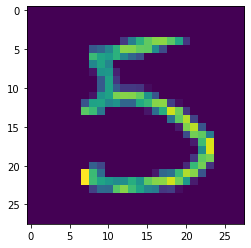

In [26]:
plt.imshow(x_test[15])
plt.show()

In [27]:
tf.__version__

'2.0.0'